In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import argparse
import copy

plt.style.use('sarah_plt_style.mplstyle')

Lets use a non-idea example image (includes other objects in the image and has some uneven brightness across the image)

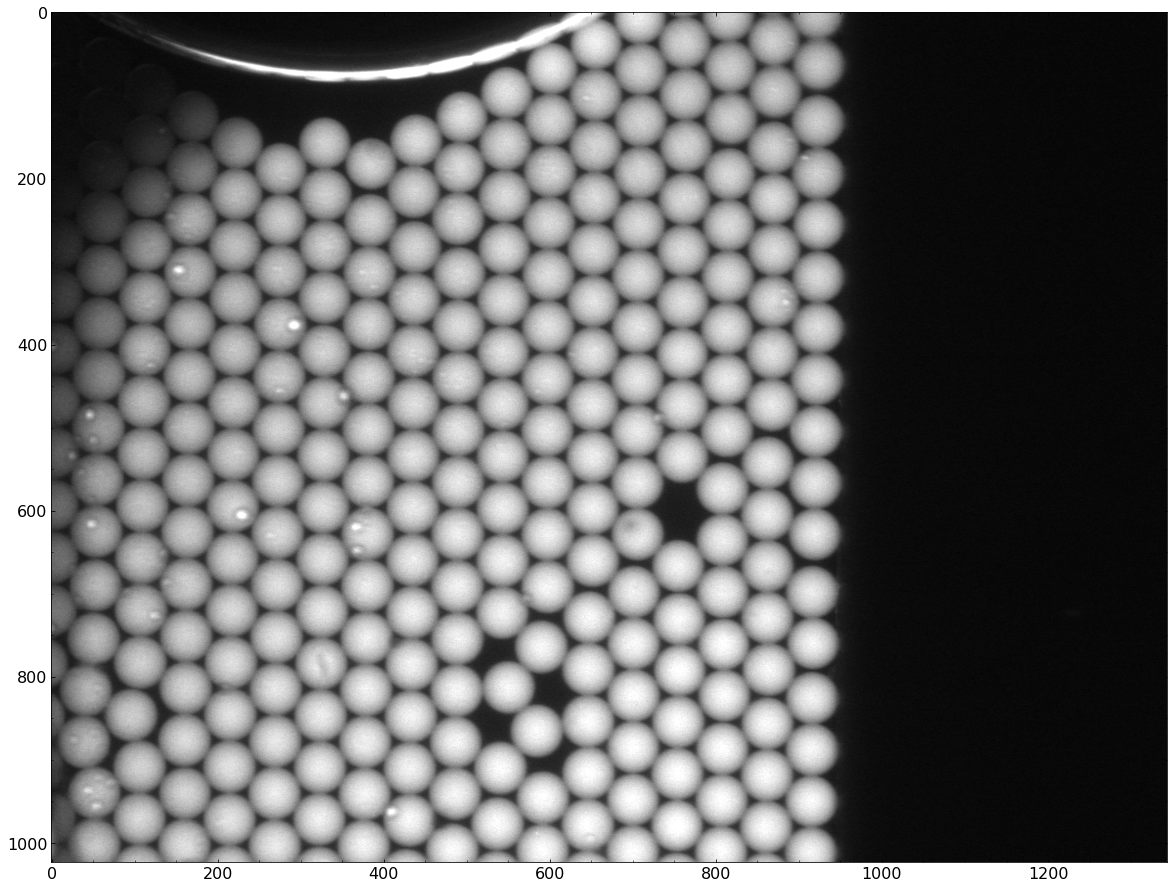

In [2]:
#change and get current working directory (cwd)
os.chdir('{}\Images'.format(os.getcwd()))
image_dir = os.getcwd()

#load image files
image = plt.imread('{}\\20220818\example_image.tif'.format(image_dir))

fig, ax = plt.subplots(figsize = (20, 20))
ax.imshow(image, cmap = 'gray')
plt.show()

HoughCircles appears to be the standard for using python to find circles in images, but it is pretty sensitive to the parameters. Even once I get the parameters as optimal as I can manage (middle image below) it does a good idea of finding circles, but not properly outlining them. However if I binerize the image first to get rid of the internal variation in brightness HoughCircles does a much better job of finding the correct outline and is less sensitive to the parameters.

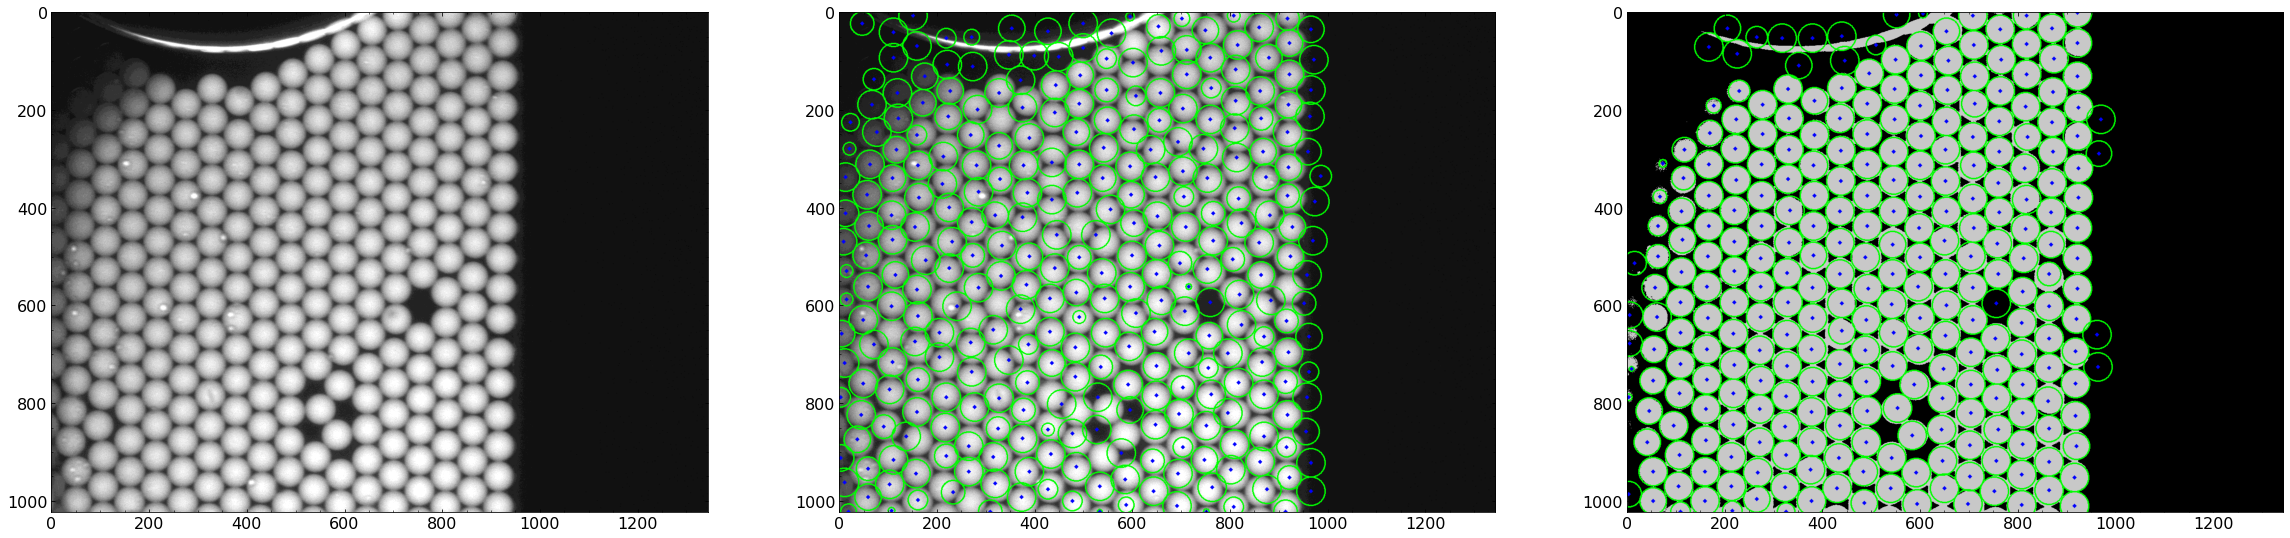

In [161]:
def find_bright_pixels(cutoff, pixel_value):
    if pixel_value > cutoff:
        return 1 #bright pixel
    else:
        return 0 #not bright pixel
    
find_bright_pixels = np.vectorize(find_bright_pixels, excluded=[0])

image = cv.imread('{}\\20220818\example_image.tif'.format(image_dir), 0)

color_img = cv.cvtColor(image,cv.COLOR_GRAY2BGR) * 17
circles = cv.HoughCircles(image, cv.HOUGH_GRADIENT, dp =2, minDist = 50, param1=5, param2=10, maxRadius = 30)
circles = np.uint16(np.around(circles))

for i in circles[0,:]:
    cv.circle(color_img,(i[0],i[1]),i[2],(0,255,0),2)
    cv.circle(color_img,(i[0],i[1]),2,(0,0,255),3)

th, bin_image = cv.threshold(image, 6, 1, cv.THRESH_BINARY)
bin_color_img = cv.cvtColor(bin_image,cv.COLOR_GRAY2BGR) *200
bin_circles = cv.HoughCircles(bin_image, cv.HOUGH_GRADIENT, dp =2, minDist = 50, param1=5, param2=10, maxRadius = 30)
bin_circles = np.uint16(np.around(bin_circles))
for i in bin_circles[0,:]:
    cv.circle(bin_color_img,(i[0],i[1]),i[2],(0,255,0),2)
    cv.circle(bin_color_img,(i[0],i[1]),2,(0,0,255),3)

fig, axs = plt.subplots(1, 3, figsize = (40,20))
axs[0].imshow(image, cmap = 'gray')
axs[1].imshow(color_img, cmap = 'gray')
axs[2].imshow(bin_color_img, cmap = 'gray')